<a href="https://colab.research.google.com/github/shilphypg/DSA_ICTAK/blob/main/Internship_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction and Job Analysis using Machine Learning

# Dataset Description
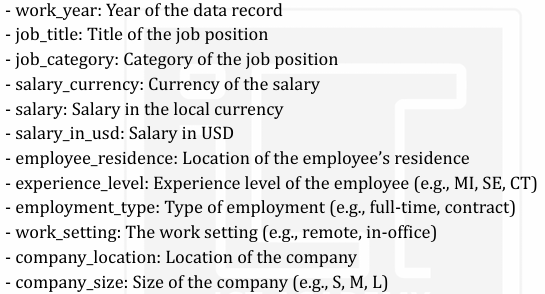

# Goals and Weekly Plan
Goal: Familiarize with the dataset, clean and preprocess the data, and perform exploratory
 data analysis (EDA) to understand patterns and relationships.

# Week1: Data Understanding, Cleaning, and EDA

# 1. Data Loading and Inspection:

Load the dataset, examine columns, data types, and identify any missing or inconsistent values.- Convert data types where necessary (e.g., dates, categorical encoding).

**Import the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Load the Dataset

In [ ]:
df = pd.read_excel("/content/dsa_job.xlsx")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


No of rows and columns in the dataframe

In [ ]:
df.shape

(5000, 12)

List of columns

In [ ]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

Column datatypes

In [ ]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


Information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


Check for missing values

In [ ]:
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
import re

# Define patterns to map job titles to categories
job_patterns = {
    r'Data Analyst': 'Analysis',
    r'Data Engineer': 'Engineering',
    r'Data Scientist': 'Data Science',
    r'Machine Learning Engineer': 'ML/AI',
    r'Statistician': 'Quantitative Analyst'
}

# Function to determine job category based on regex patterns
def get_job_category(job_title):
    for pattern, category in job_patterns.items():
        if re.search(pattern, job_title, re.IGNORECASE):
            return category
    return None  # Return None if no pattern is matched

# Apply the function to create or update 'job_category' based on 'job_title'
df['job_category'] = df['job_title'].apply(lambda title: get_job_category(title) or df['job_category'])

# Display the updated DataFrame to verify
df[['job_title', 'job_category']].head()

,job_title,job_category
0,Machine Learning Engineer in office,ML/AI
1,Statistician (Remote),Quantitative Analyst
2,Machine Learning Engineer,ML/AI
3,Data Analyst in office,Analysis
4,Statistician,Quantitative Analyst


In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Quantitative Analyst,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('exported_dataframe.csv', index=False)

# You can also export to other formats like Excel:
# df.to_excel('exported_dataframe.xlsx', index=False)

# Download the file from Colab (optional):
from google.colab import files
files.download('exported_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re

# Define patterns to map job titles to work settings
job_patterns_to_work_setting = {
    r'^Data Analyst$': 'Hybrid',
    r'^Data Analyst\s+\(Remote\)$': 'Remote',
    r'^Data Analyst\s+in office$': 'In-person',
    r'^Data Engineer$': 'Hybrid',
    r'^Data Engineer\s+\(Remote\)$': 'Remote',
    r'^Data Engineer\s+in office$': 'In-person',
    r'^Data Scientist$': 'Hybrid',
    r'^Data Scientist\s+\(Remote\)$': 'Remote',
    r'^Data Scientist\s+in office$': 'In-person',
    r'^Machine Learning Engineer$': 'Hybrid',
    r'^Machine Learning Engineer\s+\(Remote\)$': 'Remote',
    r'^Machine Learning Engineer\s+in office$': 'In-person',
    r'^Statistician$': 'Hybrid',
    r'^Statistician\s+\(Remote\)$': 'Remote',
    r'^Statistician\s+in office$': 'In-person'
}

# Function to determine work setting based on regex patterns
def get_work_setting(job_title):
    for pattern, work_setting in job_patterns_to_work_setting.items():
        if re.search(pattern, job_title, re.IGNORECASE):
            return work_setting
    return None  # Return None if no pattern is matched

# Apply the function to create or update 'work_setting' based on 'job_title'
df['work_setting'] = df['job_title'].apply(lambda title: get_work_setting(title) or df['work_setting'])

# Display the updated DataFrame with corrected 'work_setting' values to verify
df[['job_title', 'work_setting']].head()

,job_title,work_setting
0,Machine Learning Engineer in office,In-person
1,Statistician (Remote),Remote
2,Machine Learning Engineer,Hybrid
3,Data Analyst in office,In-person
4,Statistician,Hybrid


In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,JPY,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,EUR,172312,35156,UK,MI,FT,Hybrid,UK,S


In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('exported_dataframe1.csv', index=False)

# You can also export to other formats like Excel:
# df.to_excel('exported_dataframe.xlsx', index=False)

# Download the file from Colab (optional):
from google.colab import files
files.download('exported_dataframe1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import re

# Define a dictionary mapping country codes/abbreviations to currency codes
country_to_currency = {
    r'UK': 'GBP',
    r'DE': 'EUR',
    r'MX': 'MXN',
    r'IN': 'INR',
    r'CN': 'CNY',
    r'US': 'USD'
}

# Function to categorize salary currency based on company location
def categorize_salary_currency(company_location):
    for country_pattern, currency in country_to_currency.items():
        if re.search(country_pattern, company_location, re.IGNORECASE):
            return currency
    return 'JPY'  # Default currency if no match is found

# Apply the function to create or update 'salary_currency' based on 'company_location'
df['salary_currency'] = df['company_location'].apply(categorize_salary_currency)

# Display the updated DataFrame to verify
df[['company_location', 'salary_currency']].head()

,company_location,salary_currency
0,DE,EUR
1,IN,INR
2,CN,CNY
3,MX,MXN
4,UK,GBP


In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S


In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
df['experience_level'].value_counts()

,count
experience_level,
SE,1154
EX,1119
EN,1115
MI,1112


In [ ]:
df['company_size'].value_counts()

,count
company_size,
S,1519
M,1517
L,1464


In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156,UK,MI,FT,Hybrid,UK,S


In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('exported_dataframe3.csv', index=False)

# You can also export to other formats like Excel:
# df.to_excel('exported_dataframe.xlsx', index=False)

# Download the file from Colab (optional):
from google.colab import files
files.download('exported_dataframe3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
df.describe().astype(int)

,work_year,salary,salary_in_usd
count,5000,5000,5000
mean,2020,102046,114076
std,0,70853,49113
min,2020,-198754,30016
25%,2020,64295,71343
50%,2021,110636,114167
75%,2022,153104,156665
max,2022,199924,199985


Duplicated Records in dataset

In [ ]:
df[df.duplicated()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size


In [ ]:
df[df.duplicated()].shape

(0, 12)

Missing values

In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
df.shape

(5000, 12)

In [ ]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


In [ ]:
# Remove any commas or other non-numeric characters if necessary
df['salary_in_usd'] = df['salary_in_usd'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,float64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


**Univariate** **Analysis**

Categorical Columns


Value counts for job_title:
 job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist                          353
Data Analyst  in office                 339
Data Engineer  (Remote)                 338
Data Analyst  (Remote)                  336
Machine Learning Engineer  in office    331
Data Scientist  in office               330
Machine Learning Engineer  (Remote)     327
Statistician  (Remote)                  323
Statistician  in office                 317
Data Scientist  (Remote)                310
Data Analyst                            309
Machine Learning Engineer               306
Name: count, dtype: int64


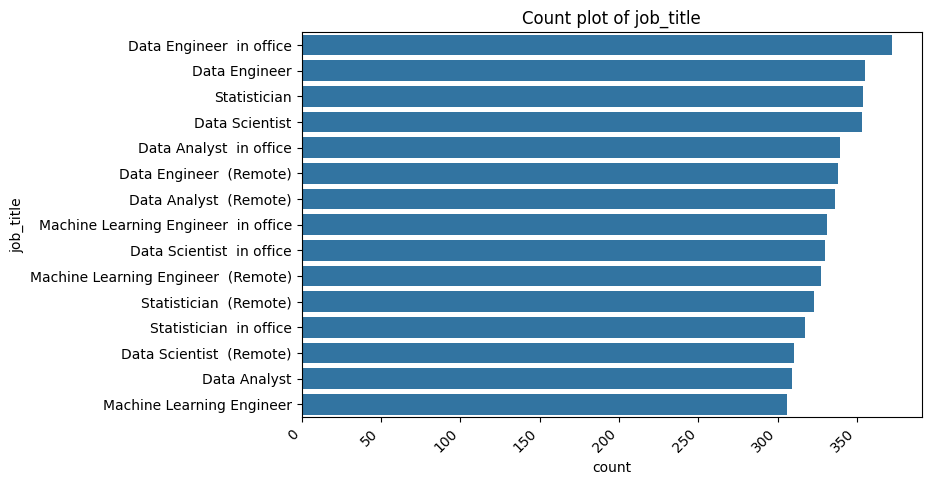


Value counts for job_category:
 job_category
Engineering             1065
Quantitative Analyst     994
Data Science             993
Analysis                 984
ML/AI                    964
Name: count, dtype: int64


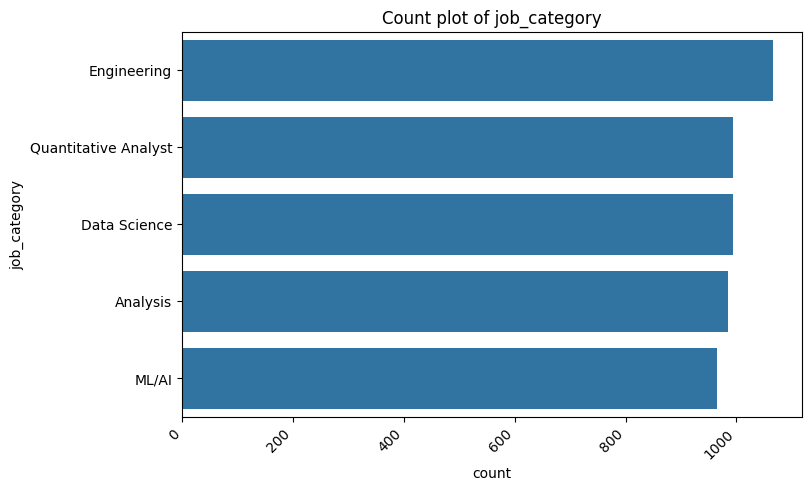


Value counts for salary_currency:
 salary_currency
GBP    789
EUR    726
MXN    713
INR    708
CNY    697
USD    684
JPY    683
Name: count, dtype: int64


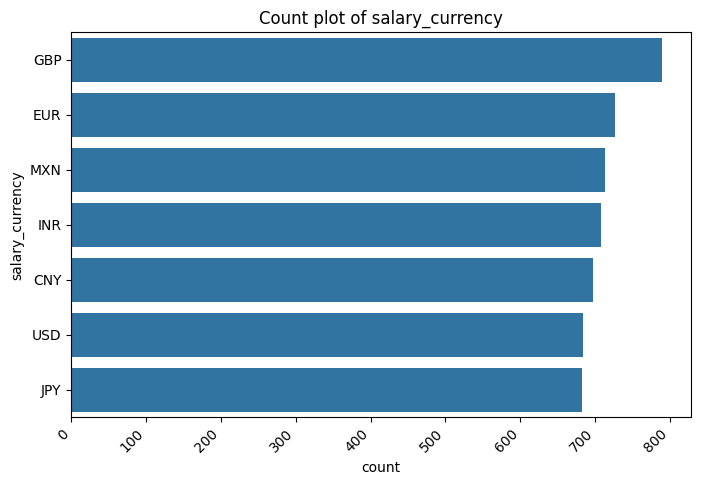


Value counts for employee_residence:
 employee_residence
JP    783
IN    741
US    721
DE    706
MX    705
CN    674
UK    670
Name: count, dtype: int64


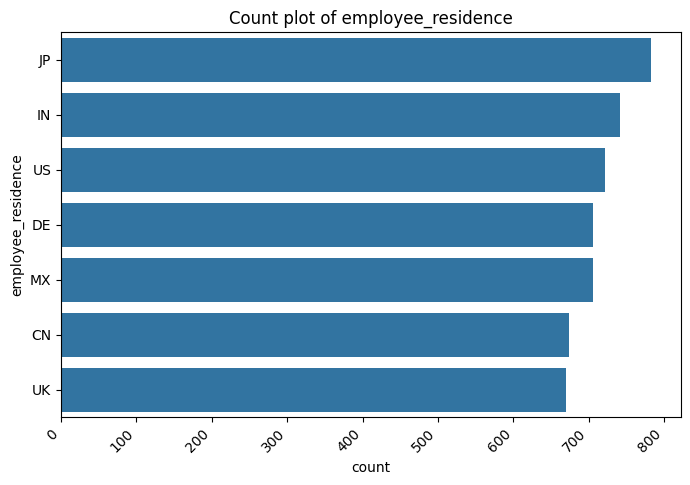


Value counts for experience_level:
 experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64


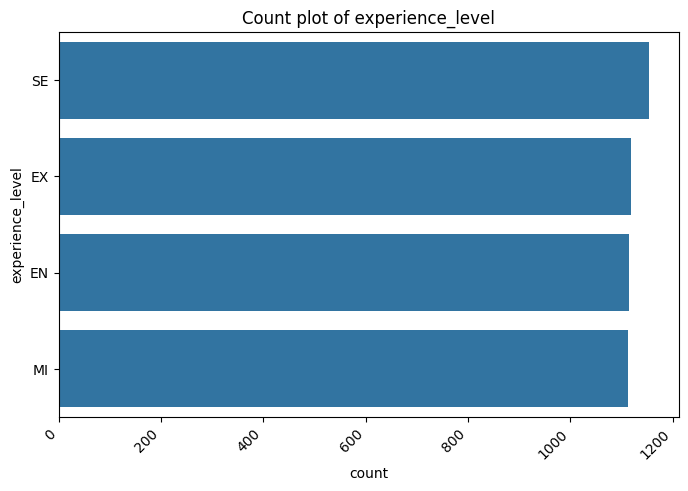


Value counts for employment_type:
 employment_type
PT    1268
FL    1263
FT    1245
CT    1224
Name: count, dtype: int64


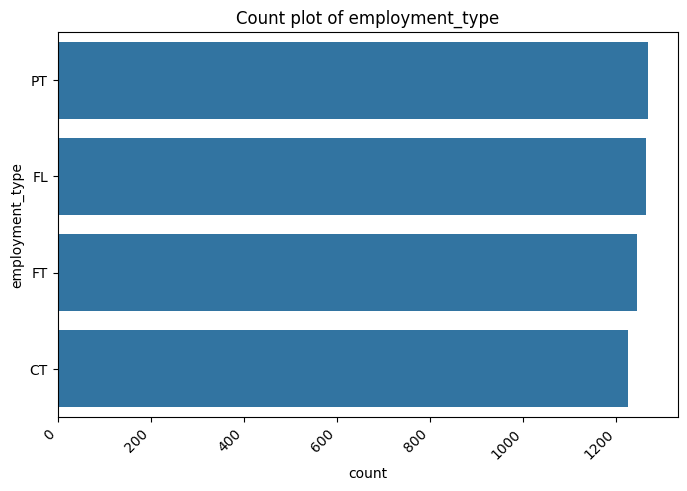


Value counts for work_setting:
 work_setting
In-person    1689
Hybrid       1677
Remote       1634
Name: count, dtype: int64


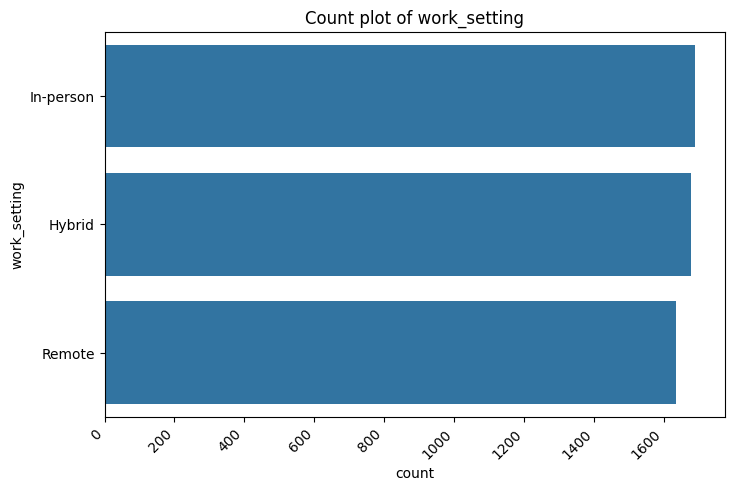


Value counts for company_location:
 company_location
UK    789
DE    726
MX    713
IN    708
CN    697
US    684
JP    683
Name: count, dtype: int64


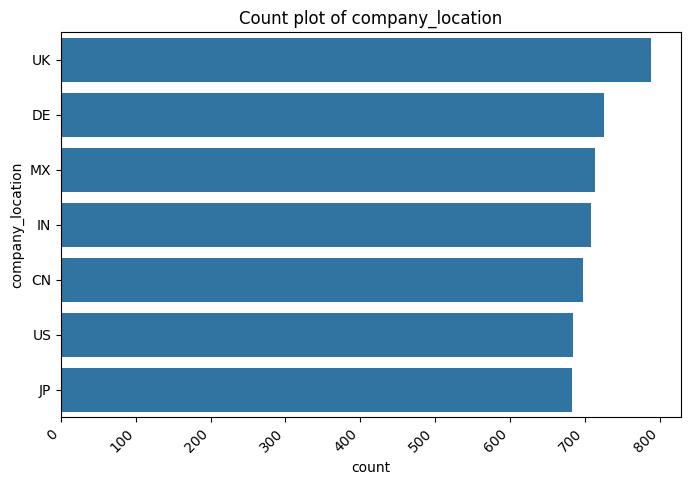


Value counts for company_size:
 company_size
S    1519
M    1517
L    1464
Name: count, dtype: int64


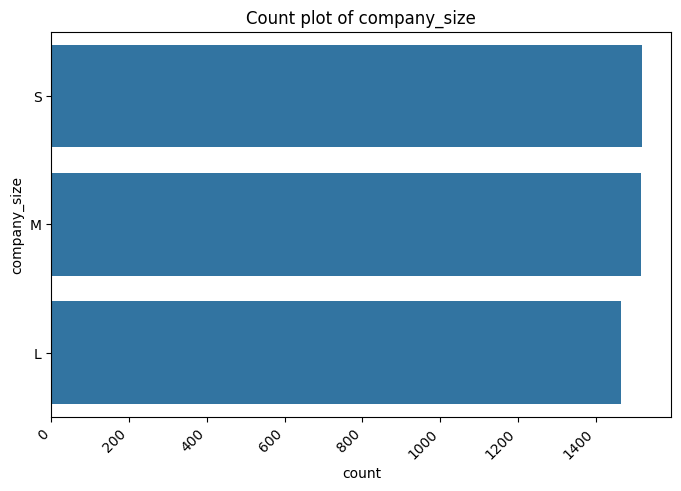

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Print unique values and counts for each categorical column
for col in categorical_cols:
    print(f'\nValue counts for {col}:\n', df[col].value_counts())

    # Plot bar charts for each categorical column
    plt.figure(figsize=(8, 5))  # Ensure plt.figure() is called correctly
    sns.countplot(df[col], order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45,ha='right')
    plt.show()

Numerical Columns

        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


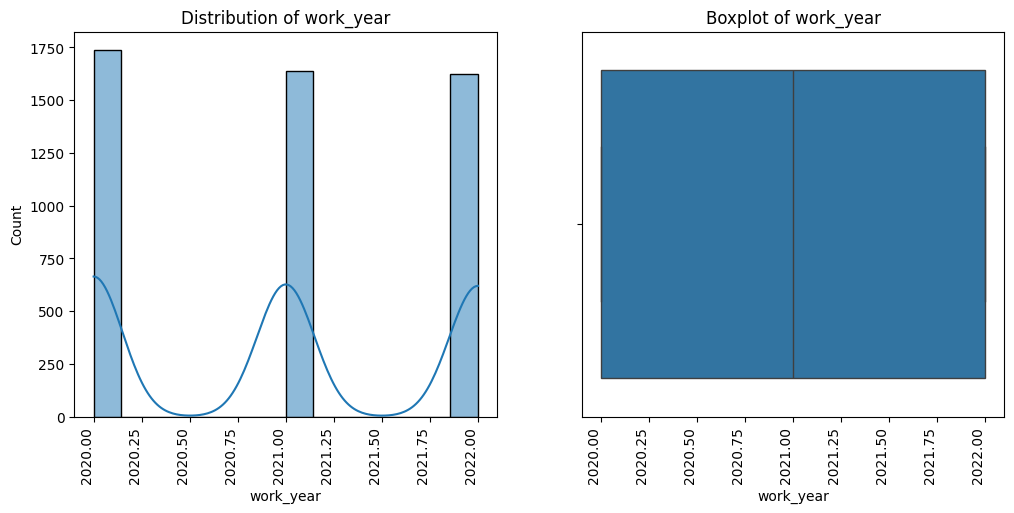

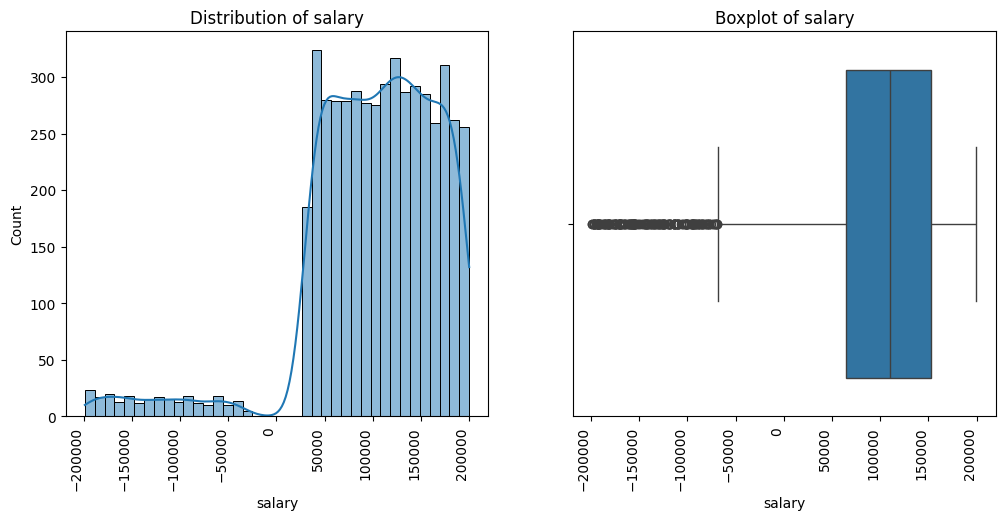

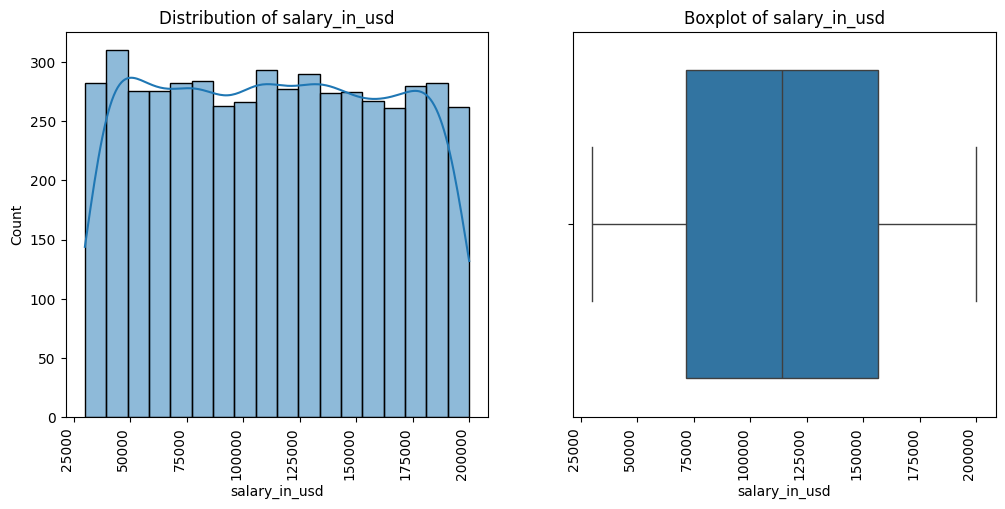

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Describe numerical columns to get summary statistics
print(df.describe())

# Plot histograms and boxplots for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90,ha='right')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=90,ha='right')
    plt.show()

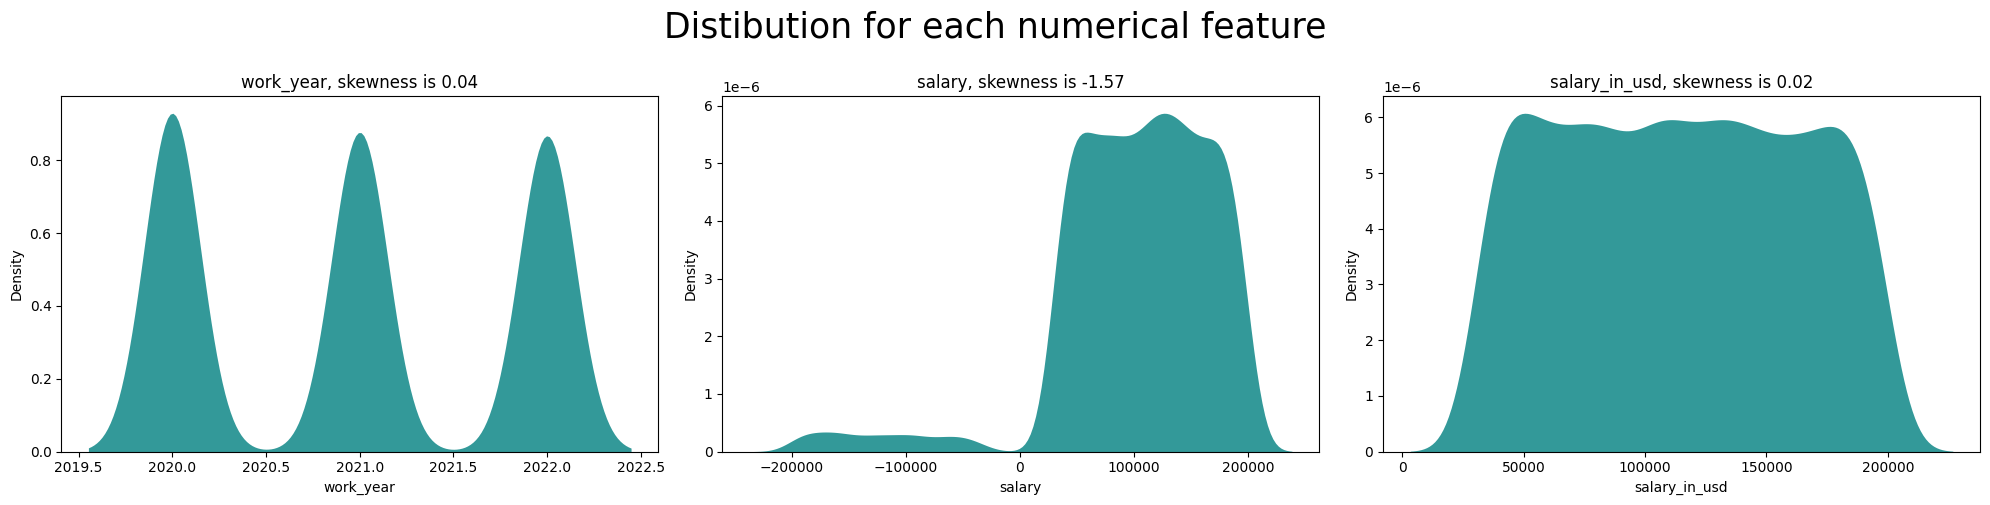

In [ ]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df, columns_list=numerical_cols, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()

**Bivariate** **Analysis**

Categorical Columns

1. Frequency Table

In [ ]:
# Example: Frequency table of 'job_category' and 'experience_level'
cross_tab = pd.crosstab(df['job_category'], df['experience_level'])
print(cross_tab)

experience_level       EN   EX   MI   SE
job_category                            
Analysis              231  213  227  227
Data Science          238  223  219  212
Engineering           225  250  243  247
ML/AI                 202  214  203  230
Quantitative Analyst  219  219  220  238


2. Heatmap of Frequency Table

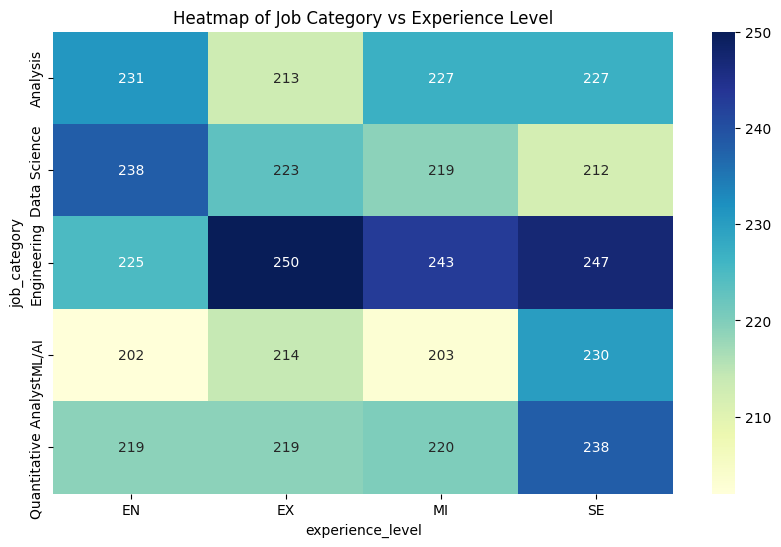

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a cross-tabulation of two categorical columns
cross_tab = pd.crosstab(df['job_category'], df['experience_level'])

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Job Category vs Experience Level")
plt.show()

3. Stacked Bar Chart

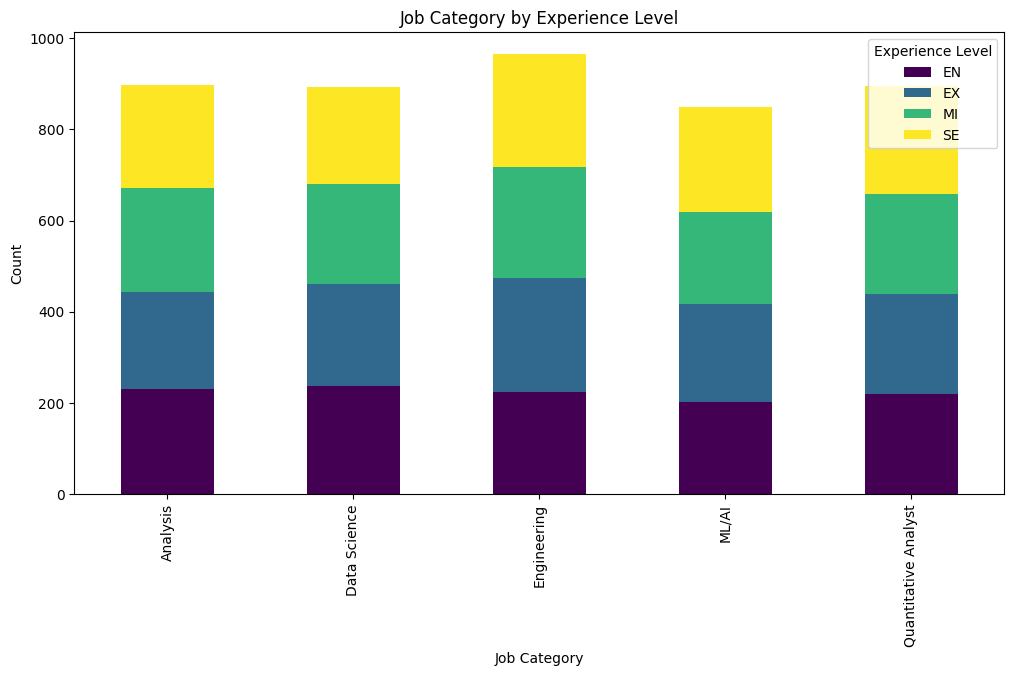

In [ ]:
# Create a grouped DataFrame for 'job_category' and 'experience_level'
job_exp_group = df.groupby(['job_category', 'experience_level']).size().unstack()

# Plot a stacked bar chart
job_exp_group.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Job Category by Experience Level")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.legend(title="Experience Level")
plt.show()


4. Count Plot with Hue

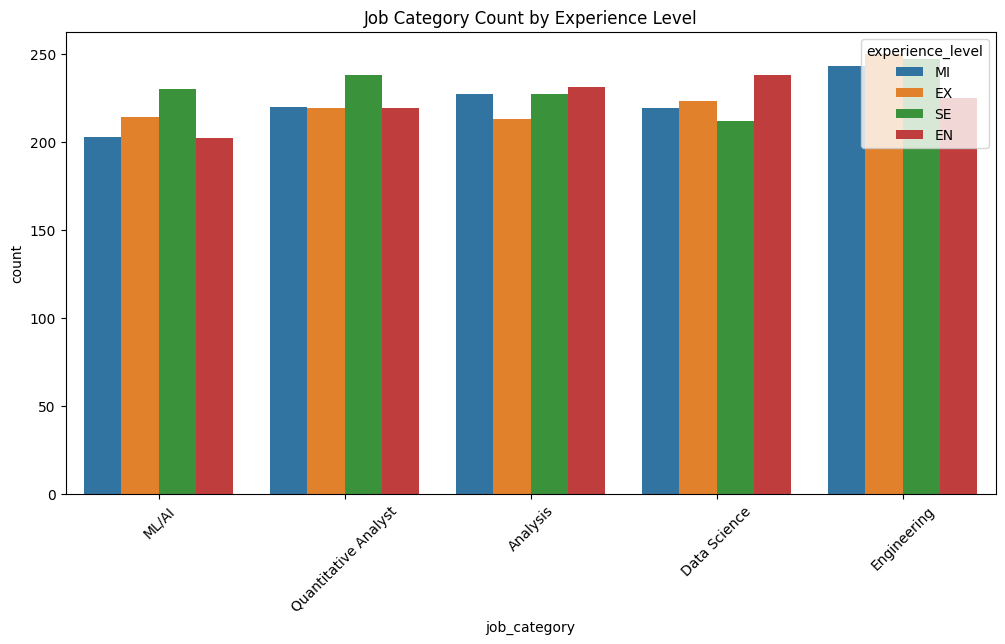

In [ ]:
# Example: Count plot for 'job_category' with 'experience_level' as hue
plt.figure(figsize=(12, 6))
sns.countplot(x='job_category', hue='experience_level', data=df)
plt.title("Job Category Count by Experience Level")
plt.xticks(rotation=45)
plt.show()

Numerical columns

1. Box Plot

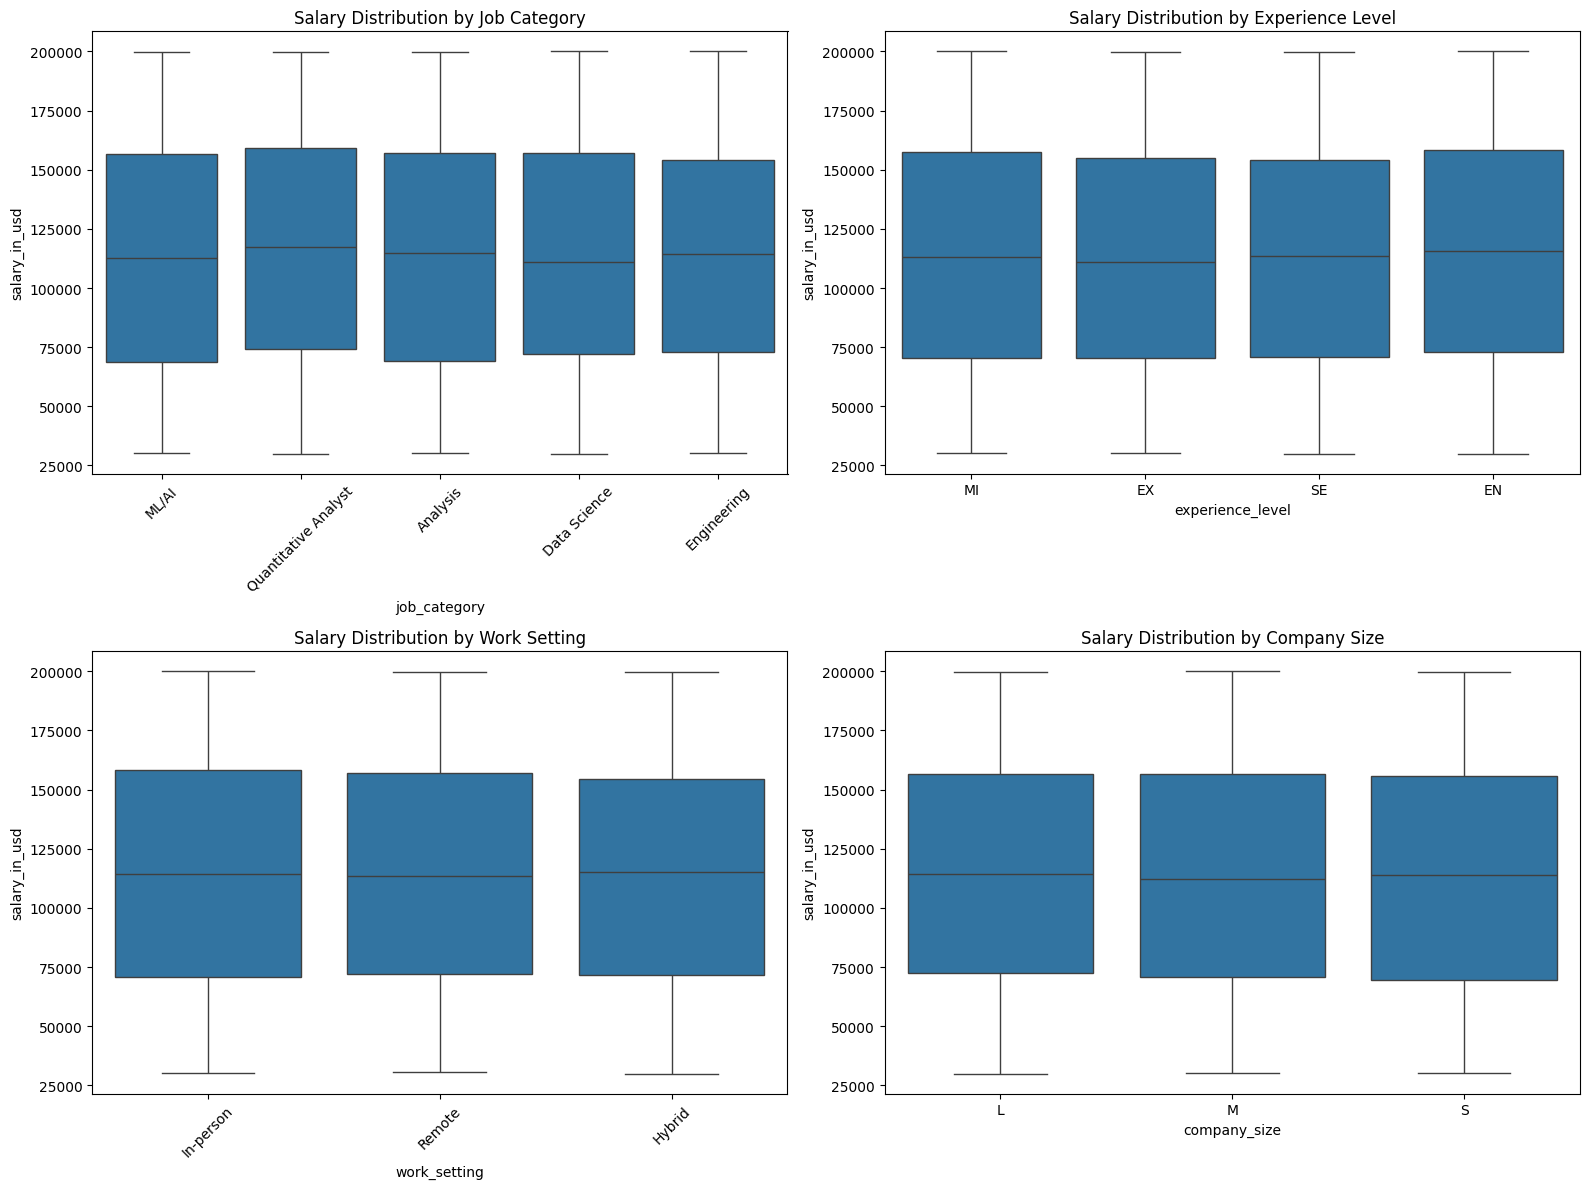

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot salary distribution by job_category, experience_level, work_setting, and company_size
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Experience Level')

plt.subplot(2, 2, 3)
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Work Setting')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Company Size')

plt.tight_layout()
plt.show()

2. Correlation Coefficient

               work_year    salary  salary_in_usd
work_year       1.000000  0.027264      -0.015542
salary          0.027264  1.000000       0.010767
salary_in_usd  -0.015542  0.010767       1.000000


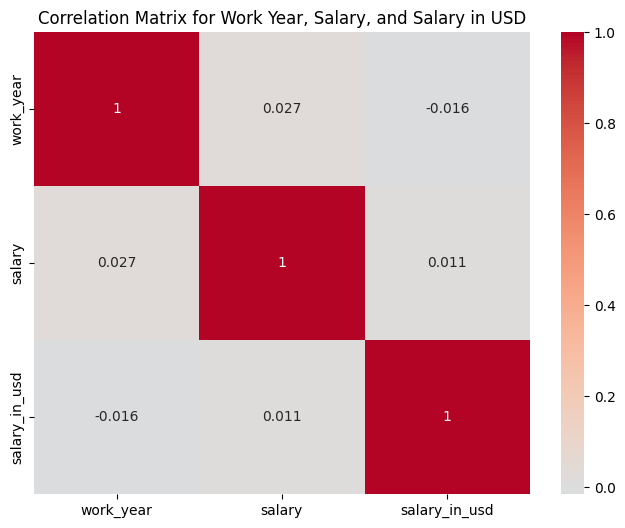

In [ ]:
# Correlation matrix for numerical columns
correlation_matrix = df[['work_year', 'salary', 'salary_in_usd']].corr()
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Work Year, Salary, and Salary in USD')
plt.show()

3. Pair Plot

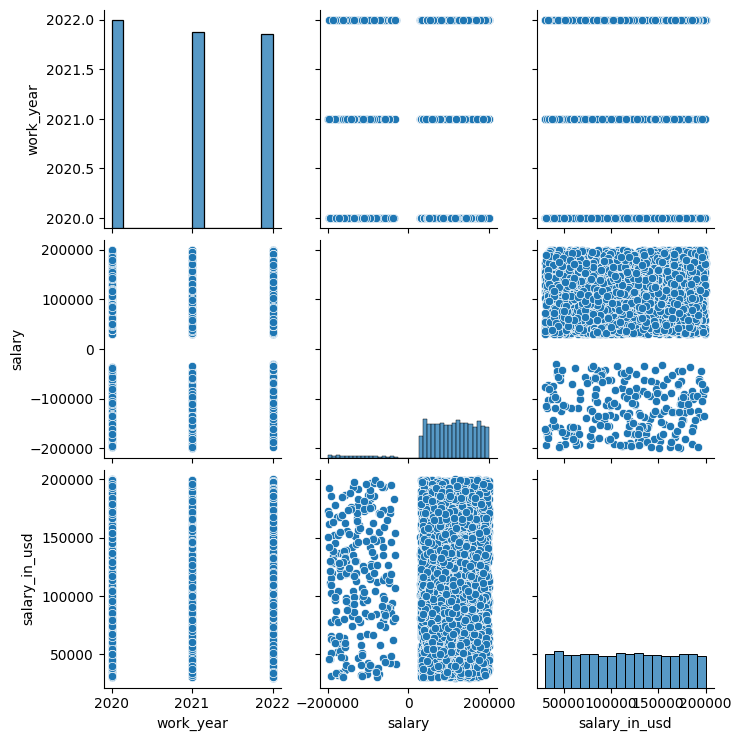

In [ ]:
# Pair plot for the numerical columns
sns.pairplot(df[['work_year', 'salary', 'salary_in_usd']])
plt.show()

5. Joint Plot

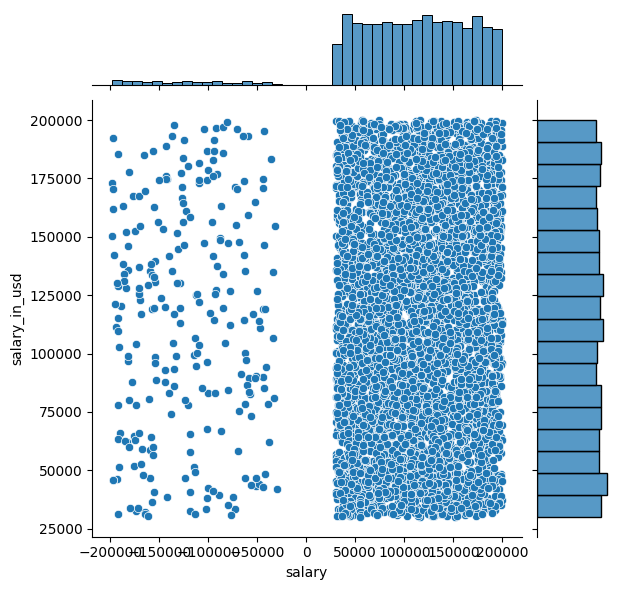

In [ ]:
# Joint plot for 'salary' and 'salary_in_usd'
sns.jointplot(x='salary', y='salary_in_usd', data=df, kind='scatter')
plt.show()

Checking for inconsistenty in dataset

In [ ]:
# Identify Duplicate Rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

# Check Data Types
print("\nData Types:\n", df.dtypes)

# Range Checks for Numerical Columns
# Example: Check salary range (replace 'salary_in_usd' with the relevant column name)
print("\nSalary Range:")
print("Min salary:", df['salary_in_usd'].min())
print("Max salary:", df['salary_in_usd'].max())

# Check for Inconsistent Categorical Values
# Identify unique values for each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':", df[col].unique())


Number of duplicate rows: 0

Data Types:
 work_year               int64
job_title              object
job_category           object
salary_currency        object
salary                  int64
salary_in_usd         float64
employee_residence     object
experience_level       object
employment_type        object
work_setting           object
company_location       object
company_size           object
dtype: object

Salary Range:
Min salary: 30016.0
Max salary: 199985.0

Unique values in 'job_title': ['Machine Learning Engineer  in office' 'Statistician  (Remote)'
 'Machine Learning Engineer' 'Data Analyst  in office' 'Statistician'
 'Data Scientist  (Remote)' 'Data Analyst' 'Data Engineer  in office'
 'Data Scientist' 'Machine Learning Engineer  (Remote)' 'Data Engineer'
 'Data Engineer  (Remote)' 'Data Scientist  in office'
 'Data Analyst  (Remote)' 'Statistician  in office']

Unique values in 'job_category': ['ML/AI' 'Quantitative Analyst' 'Analysis' 'Data Science' 'Engineering']

Uni

Convert data types

In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086.0,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982.0,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309.0,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242.0,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156.0,UK,MI,FT,Hybrid,UK,S


# 2. Data Cleaning:


1. Handle Missing Values: Imputation or Removal

In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


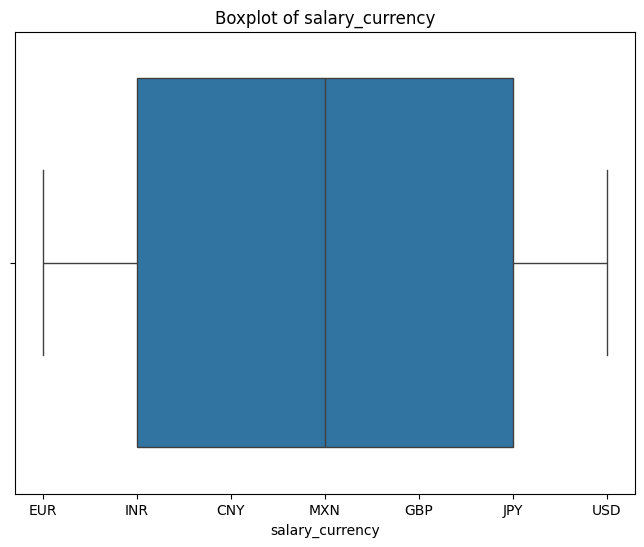

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'salary_currency' column
plt.figure(figsize=(8,6))  # Optional: Set the figure size
sns.boxplot(x=df['salary_currency'])

# Add title and labels for clarity
plt.title('Boxplot of salary_currency')
plt.xlabel('salary_currency')

# Show the plot
plt.show()       #normal Distribution

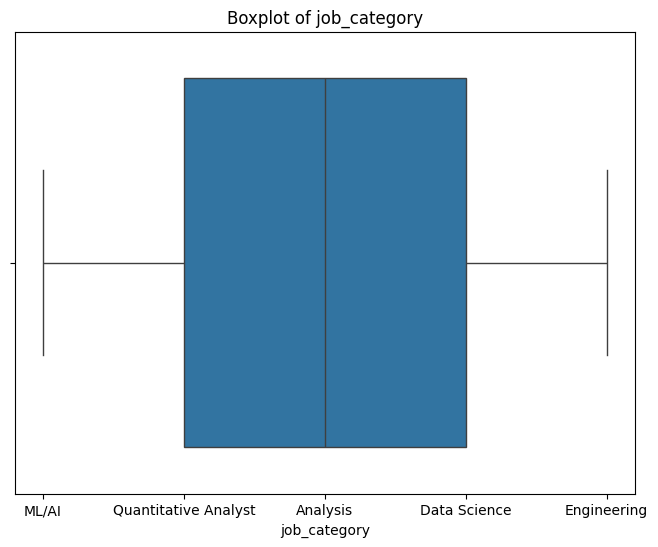

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'salary_currency' column
plt.figure(figsize=(8,6))  # Optional: Set the figure size
sns.boxplot(x=df['job_category'])

# Add title and labels for clarity
plt.title('Boxplot of job_category')
plt.xlabel('job_category')

# Show the plot
plt.show()

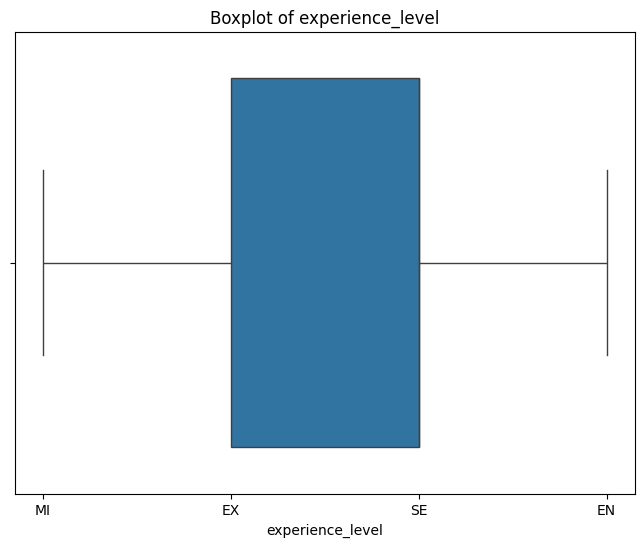

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'salary_currency' column
plt.figure(figsize=(8,6))  # Optional: Set the figure size
sns.boxplot(x=df['experience_level'])

# Add title and labels for clarity
plt.title('Boxplot of experience_level')
plt.xlabel('experience_level')

# Show the plot
plt.show()

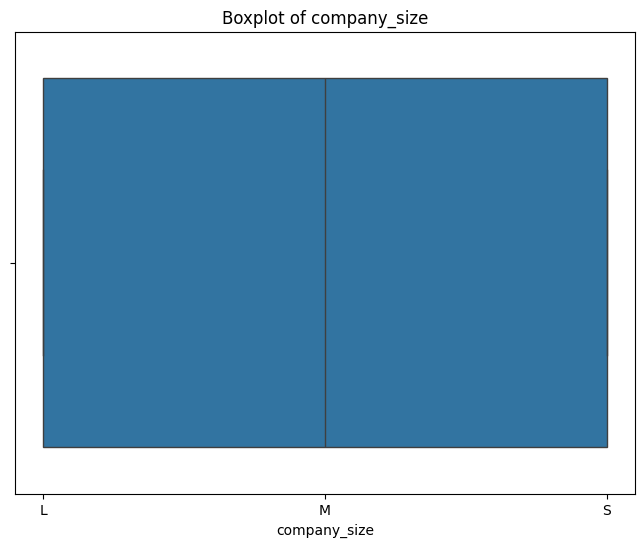

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'salary_currency' column
plt.figure(figsize=(8,6))  # Optional: Set the figure size
sns.boxplot(x=df['company_size'])

# Add title and labels for clarity
plt.title('Boxplot of company_size')
plt.xlabel('company_size')

# Show the plot
plt.show()

In [ ]:
# Fill missing values in 'company_size' with the mode of the column
company_size_mode = df['company_size'].mode()[0]
df['company_size'] = df['company_size'].fillna(company_size_mode)

# Fill missing values in 'experience_level' with the mode of the column
experience_level_mode = df['experience_level'].mode()[0]
df['experience_level'] = df['experience_level'].fillna(experience_level_mode)

# Display the updated DataFrame to check
print(df[['company_size', 'experience_level']].isna().sum())  # To verify no NaN values remain

company_size        0
experience_level    0
dtype: int64


In [ ]:
df.isna().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,EUR,186597,136086.0,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,INR,110630,67982.0,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,CNY,61280,153309.0,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,MXN,154130,135242.0,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,GBP,172312,35156.0,UK,MI,FT,Hybrid,UK,S


In [ ]:
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,205256.70,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,1438.19,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,61280.00,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,154130.00,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,224005.60,UK,MI,FT,Hybrid,UK,S


# 3. Exploratory Data Analysis (EDA):

1. Generate Descriptive Statistics

In [ ]:
# Descriptive statistics for numerical columns
print("Numerical Columns - Descriptive Statistics:")
print(df[['work_year', 'experience_level',  'salary_in_usd']].describe())

# Descriptive statistics for categorical columns
print("\nCategorical Columns - Value Counts:")
print("Job Category:")
print(df['job_category'].value_counts())
print("\nExperience Level:")
print(df['experience_level'].value_counts())
print("\nWork Setting:")
print(df['work_setting'].value_counts())
print("\nCompany Size:")
print(df['company_size'].value_counts())

Numerical Columns - Descriptive Statistics:
        work_year  salary_in_usd
count  5000.00000    5000.000000
mean   2020.97680   79730.805380
std       0.81951   82425.539739
min    2020.00000 -256422.400000
25%    2020.00000    1703.418750
50%    2021.00000   79270.000000
75%    2022.00000  144785.750000
max    2022.00000  259558.000000

Categorical Columns - Value Counts:
Job Category:
job_category
Engineering             1065
Quantitative Analyst     994
Data Science             993
Analysis                 984
ML/AI                    964
Name: count, dtype: int64

Experience Level:
experience_level
SE    1654
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64

Work Setting:
work_setting
In-person    1689
Hybrid       1677
Remote       1634
Name: count, dtype: int64

Company Size:
company_size
S    2019
M    1517
L    1464
Name: count, dtype: int64


2. Plot Distribution of Salaries by Categorical Variables

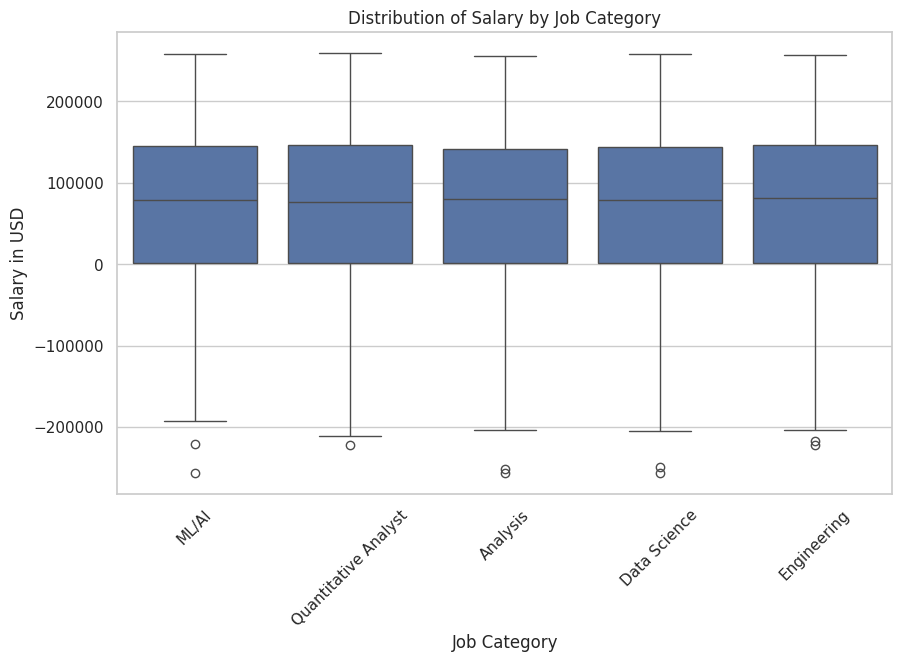

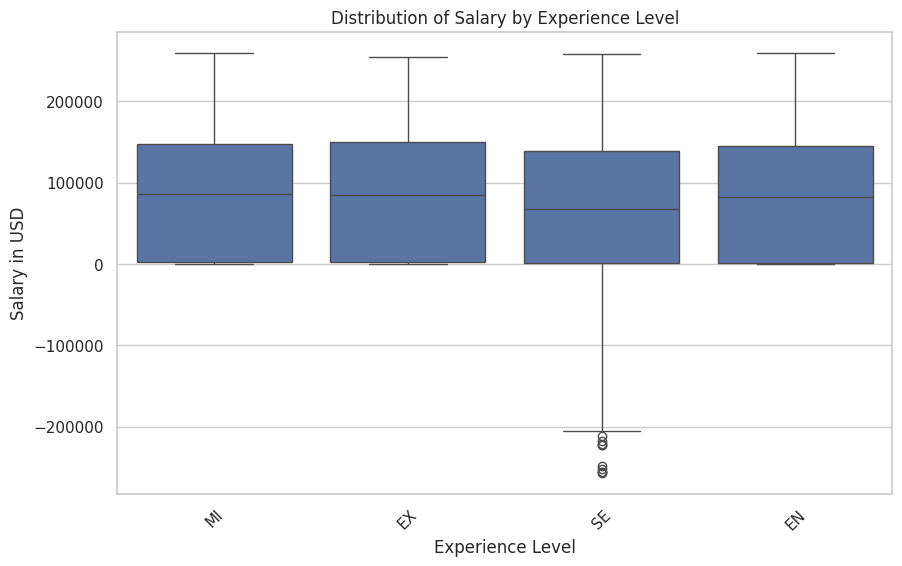

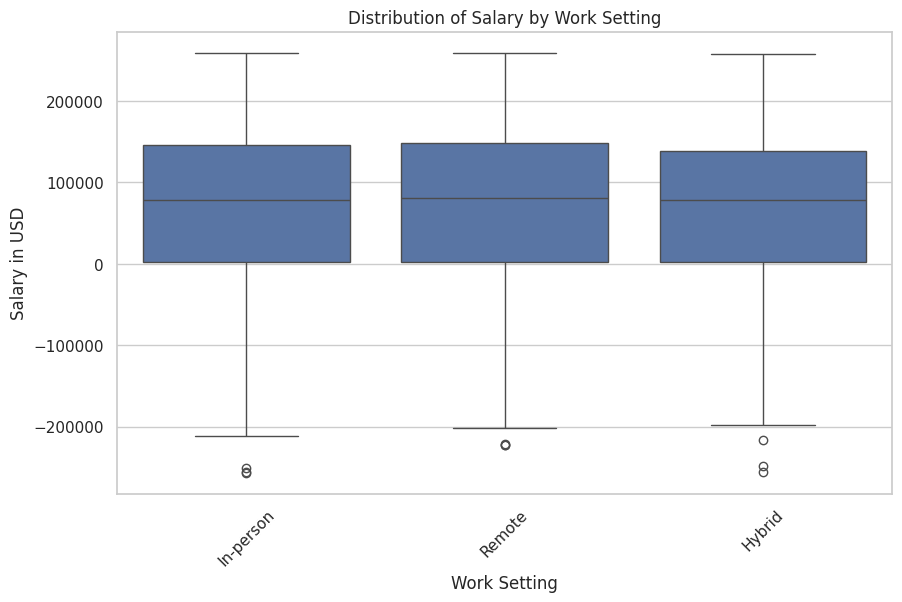

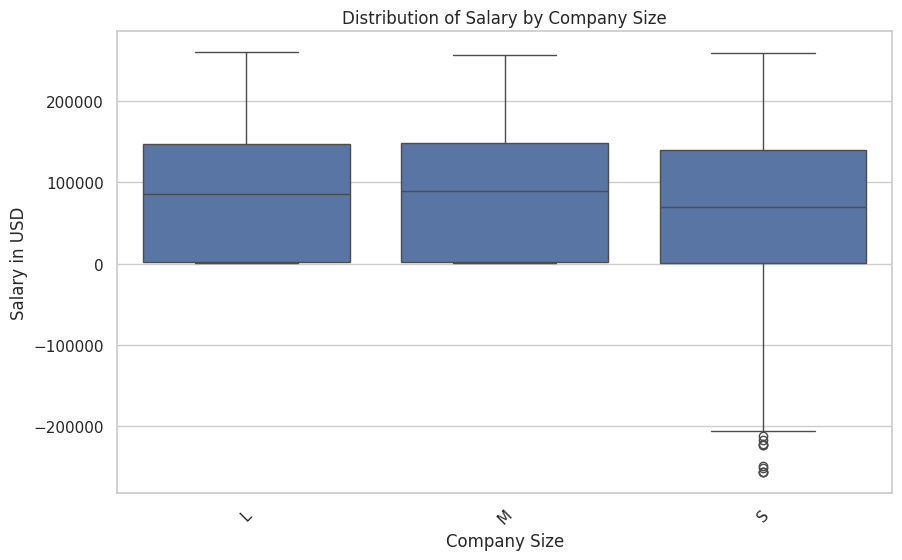

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of salary by Job Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Job Category")
plt.xlabel("Job Category")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

# Plot distribution of salary by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

# Plot distribution of salary by Work Setting
plt.figure(figsize=(10, 6))
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Work Setting")
plt.xlabel("Work Setting")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

# Plot distribution of salary by Company Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Distribution of Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,ML/AI,205256.70,US,MI,CT,In-person,DE,L
1,2020,Statistician (Remote),Quantitative Analyst,1438.19,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,61280.00,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,Analysis,154130.00,DE,SE,FT,In-person,MX,L
4,2020,Statistician,Quantitative Analyst,224005.60,UK,MI,FT,Hybrid,UK,S


In [ ]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_in_usd',
       'employee_residence', 'experience_level', 'employment_type',
       'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_in_usd,float64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object
company_location,object
company_size,object
